In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import matplotlib.pyplot as plt
import PIL
import random
from tensorflow.keras.preprocessing import image
%matplotlib inline
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
csvfile = 'list_attr_celeba.csv'
pwd = '/home/irrational/Documents/celeba/img_align_celeba/img_align_celeba/'
df = pd.read_csv(csvfile)
def img2np(path, list_of_filename, size = (218, 178)):
    # iterating through each file
    for fn in list_of_filename:
        fp = path + fn
        current_image = image.load_img(fp, target_size = size, 
                                       color_mode = 'grayscale')
        # covert image to a matrix
        img_ts = image.img_to_array(current_image)
        # turn that into a vector / 1D array
        img_ts = [img_ts.ravel()]
        try:
            # concatenate different images
            full_mat = np.concatenate((full_mat, img_ts))
        except UnboundLocalError: 
            # if not assigned yet, assign one
            full_mat = img_ts
    return full_mat
bignose_img_list = [fn for fn in df["image_id"] if df["Big_Nose"][int(fn.split('.')[0])-1] == 1]
bignose_img_list = random.sample(bignose_img_list, 1000)
bignose_imgs = img2np(pwd, bignose_img_list)
def find_mean_img(full_mat, title, size = (218, 178)):
    # calculate the average
    mean_img = np.mean(full_mat, axis = 0)
    # reshape it back to a matrix
    mean_img = mean_img.reshape(size)
    plt.imshow(mean_img, vmin=0, vmax=255, cmap='Greys_r')
    plt.title(f'Average {title}')
    plt.axis('off')
    plt.show()
    return mean_img

#norm_mean = find_mean_img(bignose_imgs, 'Big Nosed Person')

In [4]:
print(os.getcwd())

/home/irrational/Documents/celeba


In [5]:
def attrList(attr, sample_size, yes):
    if (yes > 0):
        yes = 1
    else:
        yes = -1
    attr_img_list = [fn for fn in df["image_id"] if df[attr][int(fn.split('.')[0])-1] == 1*yes]
    attr_img_list = random.sample(attr_img_list, sample_size)
    attr_imgs = img2np(pwd, attr_img_list)
    return attr_imgs
    

In [6]:
df.columns

Index(['image_id', '5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive',
       'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose',
       'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows',
       'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair',
       'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open',
       'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin',
       'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns',
       'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings',
       'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace',
       'Wearing_Necktie', 'Young'],
      dtype='object')

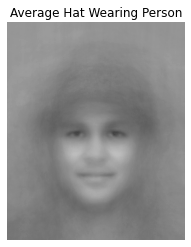

In [40]:
hat_mean = find_mean_img(attrList("Wearing_Hat", 300, 1), 'Hat Wearing Person')

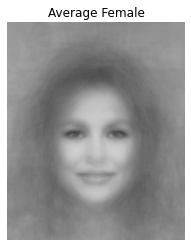

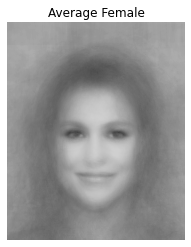

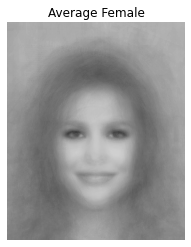

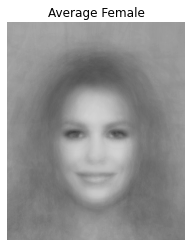

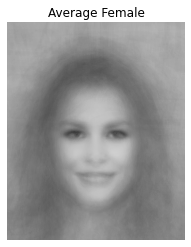

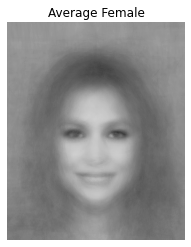

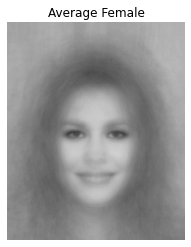

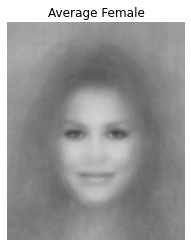

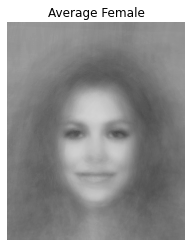

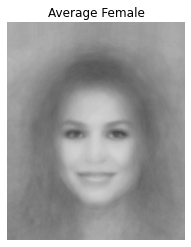

In [44]:
for i in range(0, 10):
    avg_female = find_mean_img(attrList("Male", 100, 0), 'Female')

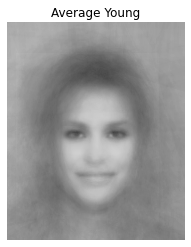

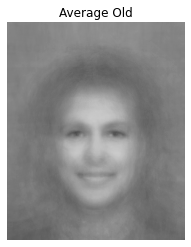

In [7]:
avg_young = find_mean_img(attrList("Young", 100, 1), "Young")
avg_old = find_mean_img(attrList("Young", 100, 0), "Old")